In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
df = pd.read_csv(r'C:\Users\singh\anaconda3\Techstack\Case Study\Big Mart Sales\Big Mart Sales\Train.csv')
print(df.shape)
df.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## fetching no. of unique types for object data types

In [214]:
print("Item_Identifier: ",df.Item_Identifier.nunique())
print("Item_Fat_Content: ",df['Item_Fat_Content'].nunique())
print("Item_Type: ",df['Item_Type'].nunique())
print("Outlet_Identifier: ",df['Outlet_Identifier'].nunique())
print("Outlet_Size: ",df['Outlet_Size'].nunique())
print("Outlet_Location_Type: ",df['Outlet_Location_Type'].nunique())
print("Outlet_Type: ",df['Outlet_Type'].nunique())


Item_Identifier:  1559
Item_Fat_Content:  5
Item_Type:  16
Outlet_Identifier:  10
Outlet_Size:  3
Outlet_Location_Type:  3
Outlet_Type:  4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002313799EF08>,
      dtype=object)

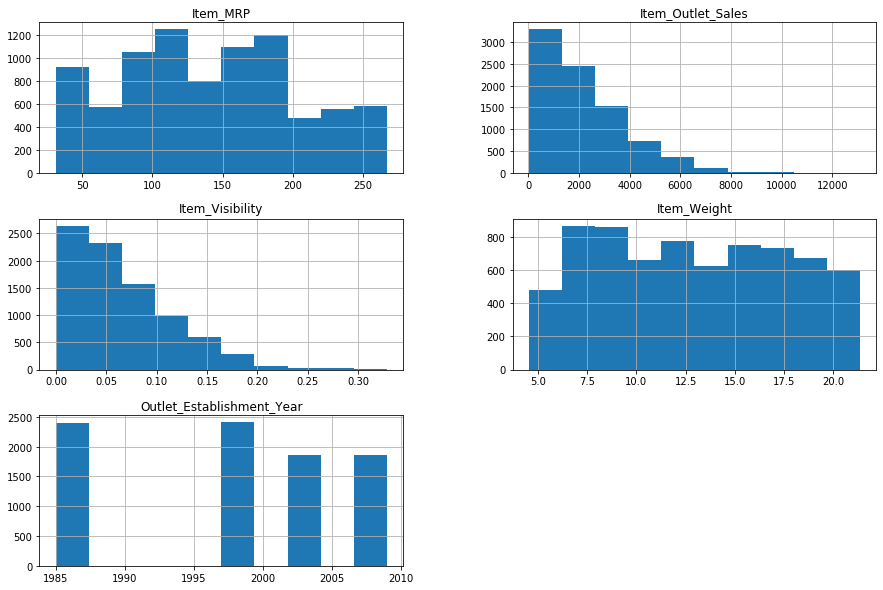

In [215]:
df.hist(figsize=(15,10))

## checking for missing values

In [216]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Item_Weight and Outlet_Size has some null values


## Imputation of missing values

In [217]:
df.groupby('Item_Type').mean()['Item_Weight']

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

## replacing the null values in Item_Weight with mean Item_Type wise

In [218]:
for i in df['Item_Type'].unique():
    li = list(df[(df['Item_Weight'].isnull()) & (df['Item_Type']==i)].index)
    df['Item_Weight'][li] = df['Item_Weight'][df['Item_Type']==i].mean()

C:\Users\singh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [219]:
df['Item_Weight'].isnull().sum()

0

In [220]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,-0.008376,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008376,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.012088,-0.128625,0.567574,-0.049135,1.000000


## we can observe that Item_MRP is highly correlated to Target 'Item_Outlet_Sales'

## and now checking other column 'Item_Fat_Content

In [221]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

## (LF, low fat and Low Fat), (Regular and reg) are similar categories

In [222]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg','Regular')

In [223]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Understanding data through Visualization

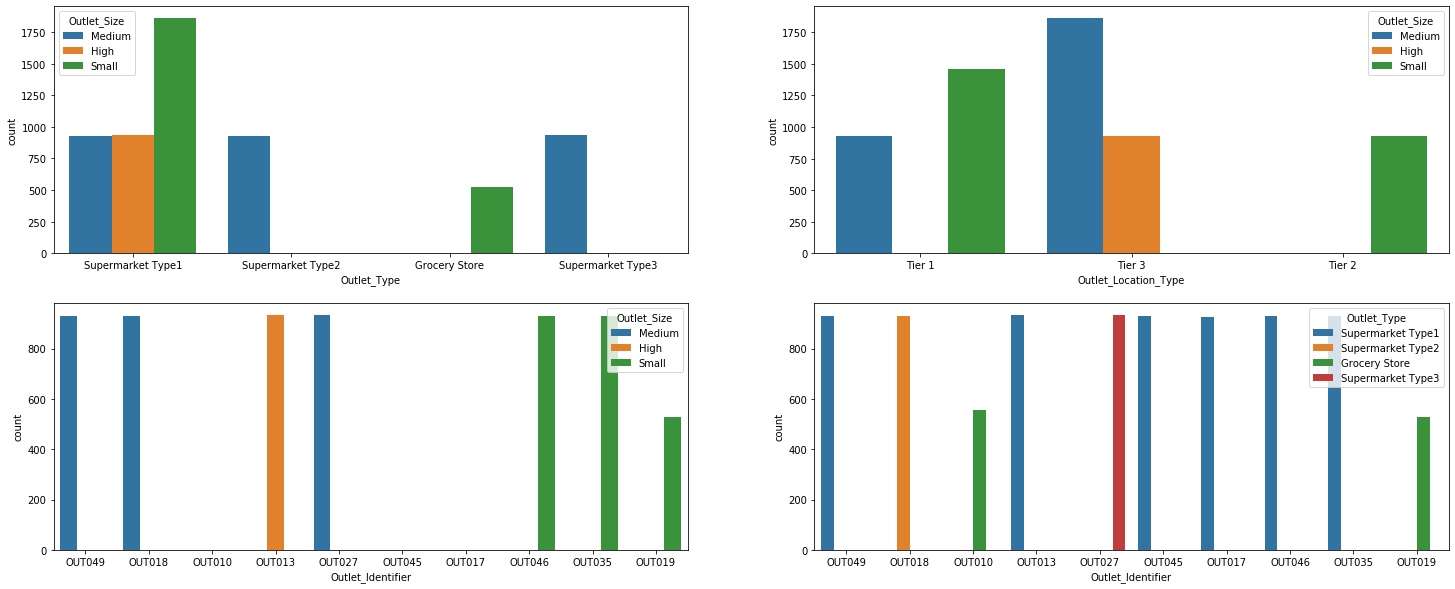

In [224]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(df['Outlet_Type'],hue=df['Outlet_Size'])
plt.subplot(2,2,2)
sns.countplot(df['Outlet_Location_Type'],hue=df['Outlet_Size'])
plt.subplot(2,2,3)
sns.countplot(df['Outlet_Identifier'],hue=df['Outlet_Size'])
plt.subplot(2,2,4)
sns.countplot(df['Outlet_Identifier'],hue=df['Outlet_Type'])

In [225]:
null_size = df[df['Outlet_Size'].isnull()]
null_size

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [226]:
null_size['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [227]:
null_size['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

## we can observe that where (Outlet_Location_Type == 'Tier3' and Outlet_Identifier == 'OUT010') and (Outlet_Location_Type == 'Tier2' Outlet_Identifier=='OUT045') there the Outlet_Size is Nan
## Also we can see that only Outlet_Identifier== ['OUT045', 'OUT010','OUT017'] are having null values 

## Another thing to observe is when OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2 then outlet size is null furthermore when OUTLET_TYPE = Grocery store and OUTLET_LOCATION_TYPE is Tier 3 then outlet size is always null

In [228]:
df.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Name: Outlet_Location_Type, dtype: int64

In [229]:
df.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [230]:
def func(x):
    if x.Outlet_Identifier=='OUT010':
        x.Outlet_Size = 'Small'
    elif x.Outlet_Identifier=='OUT017':
        x.Outlet_Size = 'Small'
    elif x.Outlet_Identifier=='OUT045':
        x.Outlet_Size = 'Small'
    return(x)
    

In [231]:
df = df.apply(func,axis=1)

In [232]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [233]:
df[df==0].count()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

## we can see that Item_Visibility is zero, therefore replacing 0.0 values with mean of Item_Visibility

In [234]:
li = list(df[df['Item_Visibility']==0].index)
df['Item_Visibility'][li] = df['Item_Visibility'].mean()

C:\Users\singh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


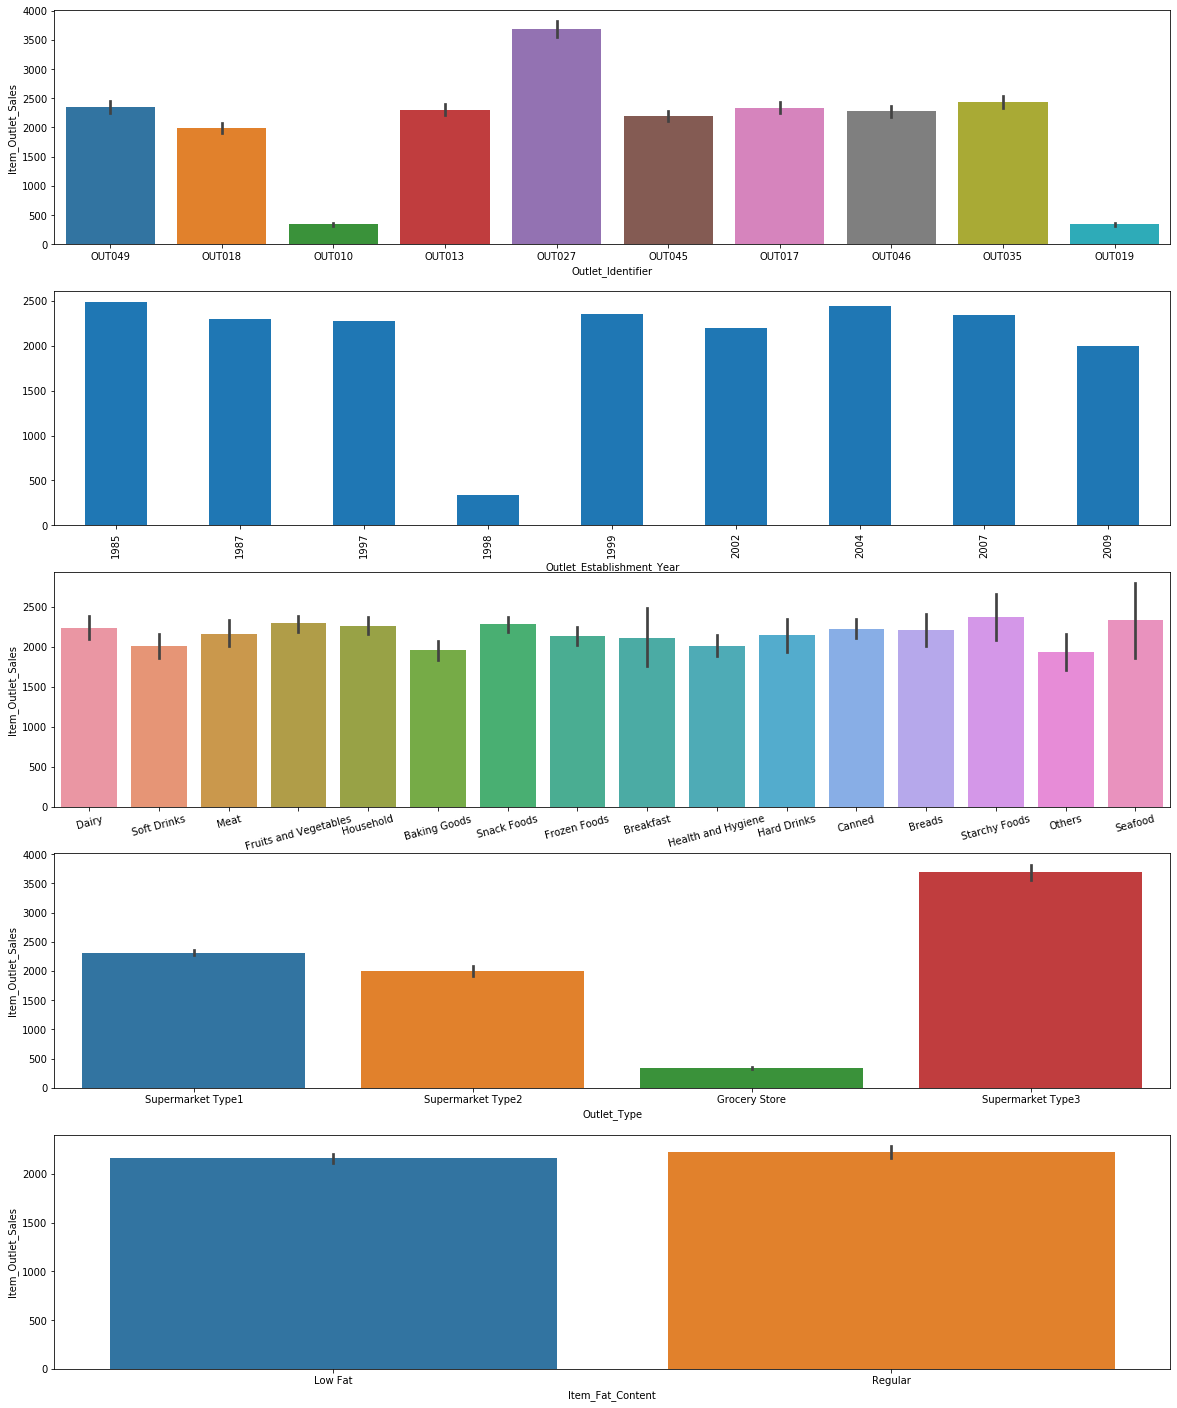

In [235]:
plt.figure(figsize=(20,25))
plt.subplot(5,1,1)
sns.barplot(df['Outlet_Identifier'],df['Item_Outlet_Sales'])
plt.subplot(5,1,2)
df.groupby('Outlet_Establishment_Year')["Item_Outlet_Sales"].mean().plot.bar()
plt.subplot(5,1,3)
sns.barplot(df['Item_Type'],df['Item_Outlet_Sales'])
plt.xticks(rotation=15)
plt.subplot(5,1,4)
sns.barplot(df['Outlet_Type'],df['Item_Outlet_Sales'])
plt.subplot(5,1,5)
sns.barplot(df['Item_Fat_Content'],df['Item_Outlet_Sales'])

## now checking MRP column since the correlation was very high with the output

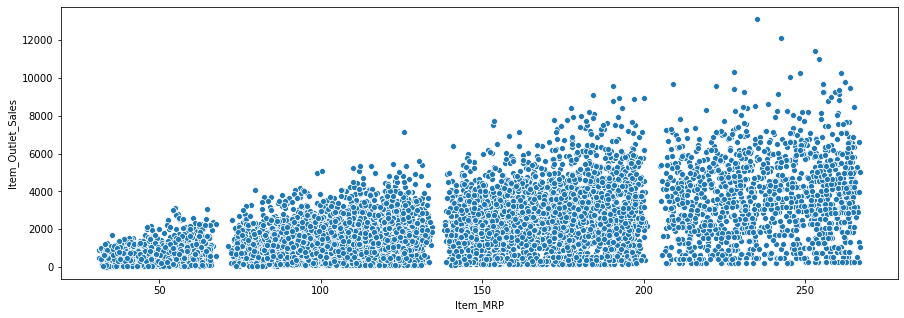

In [236]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['Item_MRP'],df['Item_Outlet_Sales'])

## as we can see Item_MRP can be divided into groups or clusters so it would be better if we convert it into bins for further processing

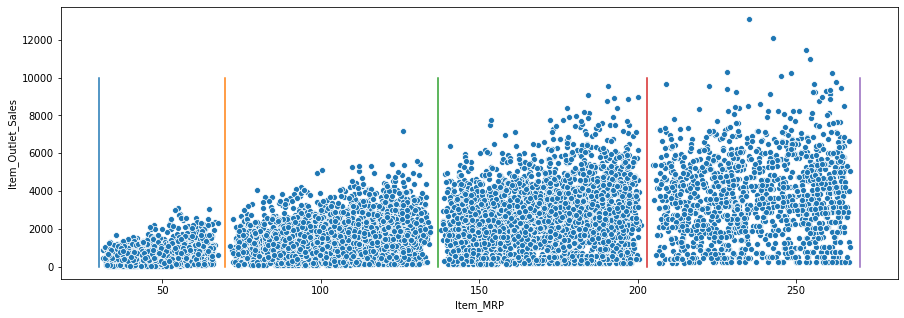

In [237]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['Item_MRP'],df['Item_Outlet_Sales'])
plt.plot([30,30],[0,10000])
plt.plot([70,70],[0,10000])
plt.plot([137,137],[0,10000])
plt.plot([203,203],[0,10000])
plt.plot([270,270],[0,10000])

In [238]:
## We can use thses perpendicular lines to divide the clusters
#df['Item_MRP'] = pd.cut(df['Item_MRP'],bins=[30,70,137,203,270],labels=['a','b','c','d'])

## Checking Outliers

In [239]:
#sns.boxplot(df['Item_MRP'],df['Item_Outlet_Sales'])

In [240]:
#df[df['Item_Outlet_Sales']==df[df['Item_MRP']=='b']['Item_Outlet_Sales'].max()]

In [241]:
## these two are considered as outliers from cluster 'b' of Item_MRP.....therefore dropping them
#li = list(df[df['Item_Outlet_Sales']==df[df['Item_MRP']=='b']['Item_Outlet_Sales'].max()].index)
#df = df.drop(index=7796)

In [242]:
#df[df['Item_MRP']=='b']['Item_Outlet_Sales'].max()

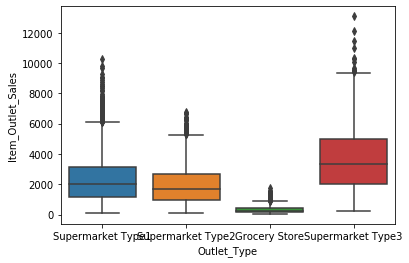

In [243]:
## Checking Outlier for Outlet_Type 
sns.boxplot(df['Outlet_Type'],df['Item_Outlet_Sales'])

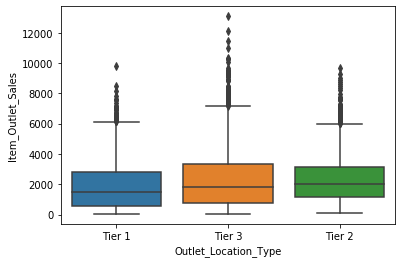

In [244]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

In [245]:
df[df['Item_Outlet_Sales'] == df[df['Outlet_Location_Type']=='Tier 1']['Item_Outlet_Sales'].max()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362


In [246]:
df = df.drop(index=4289)

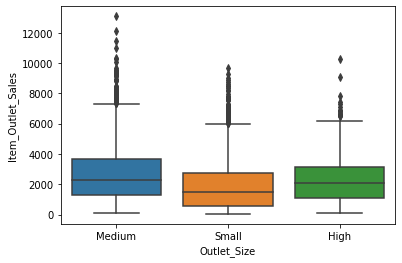

In [247]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

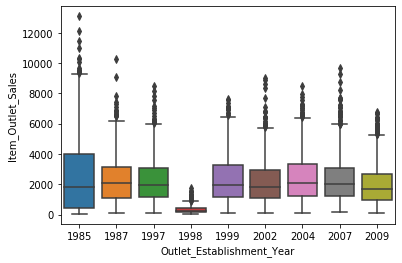

In [248]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

In [249]:
df.corr()['Item_Outlet_Sales']

Item_Weight                  0.012850
Item_Visibility             -0.134183
Item_MRP                     0.567342
Outlet_Establishment_Year   -0.049140
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [250]:
df = df.drop('Item_Weight',axis=1)

In [251]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [199]:
#attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

In [200]:
#data = df[attributes]

In [252]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8522 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   object 
 1   Item_Fat_Content           8522 non-null   object 
 2   Item_Visibility            8522 non-null   float64
 3   Item_Type                  8522 non-null   object 
 4   Item_MRP                   8522 non-null   float64
 5   Outlet_Identifier          8522 non-null   object 
 6   Outlet_Establishment_Year  8522 non-null   int64  
 7   Outlet_Size                8522 non-null   object 
 8   Outlet_Location_Type       8522 non-null   object 
 9   Outlet_Type                8522 non-null   object 
 10  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.1+ MB


## doing Count / Frequency Encoding
Implementation:
Step 1. Create Dictionaries with key as category name and value with a count of categories i.e frequency of that category in each categorical column.
Step 2. Create a new column which acts as a weight for that category and map with its respective dictionary.
Step 3. Drop Orginal Columns.

In [254]:
col = ['Item_Identifier','Item_Fat_Content','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type']

In [255]:
for i in col:
    x = df[i].value_counts().to_dict()
    df[i] = df[i].map(x)

In [256]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,8,5516,0.016047,682,249.8092,930,930,2793,2387,5576,3735.1380
1,6,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,5516,0.016760,425,141.6180,930,930,2793,2387,5576,2097.2700
3,6,3006,0.066132,1232,182.0950,555,555,4797,3350,1083,732.3800
4,6,5516,0.066132,910,53.8614,932,932,932,3350,5576,994.7052


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8522 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   int64  
 1   Item_Fat_Content           8522 non-null   int64  
 2   Item_Visibility            8522 non-null   float64
 3   Item_Type                  8522 non-null   int64  
 4   Item_MRP                   8522 non-null   float64
 5   Outlet_Identifier          8522 non-null   int64  
 6   Outlet_Establishment_Year  8522 non-null   int64  
 7   Outlet_Size                8522 non-null   int64  
 8   Outlet_Location_Type       8522 non-null   int64  
 9   Outlet_Type                8522 non-null   int64  
 10  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 1.1 MB


In [258]:
data = df.copy()

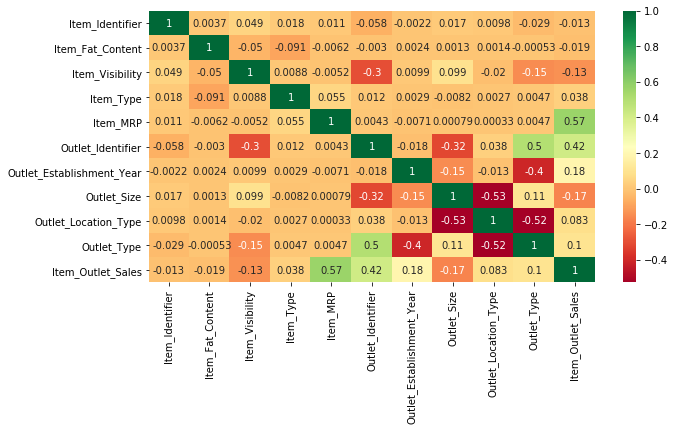

In [259]:

#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), cmap = "RdYlGn", annot = True)

In [260]:
# Dropping less correlated columns
data = data.drop(["Item_Identifier", "Item_Type", "Item_Fat_Content","Outlet_Location_Type"],axis=1)

In [261]:
data.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,0.016047,249.8092,930,930,2793,5576,3735.1380
1,0.019278,48.2692,928,928,2793,928,443.4228
2,0.016760,141.6180,930,930,2793,5576,2097.2700
3,0.066132,182.0950,555,555,4797,1083,732.3800
4,0.066132,53.8614,932,932,932,5576,994.7052


## Visualizing the skewness of the data

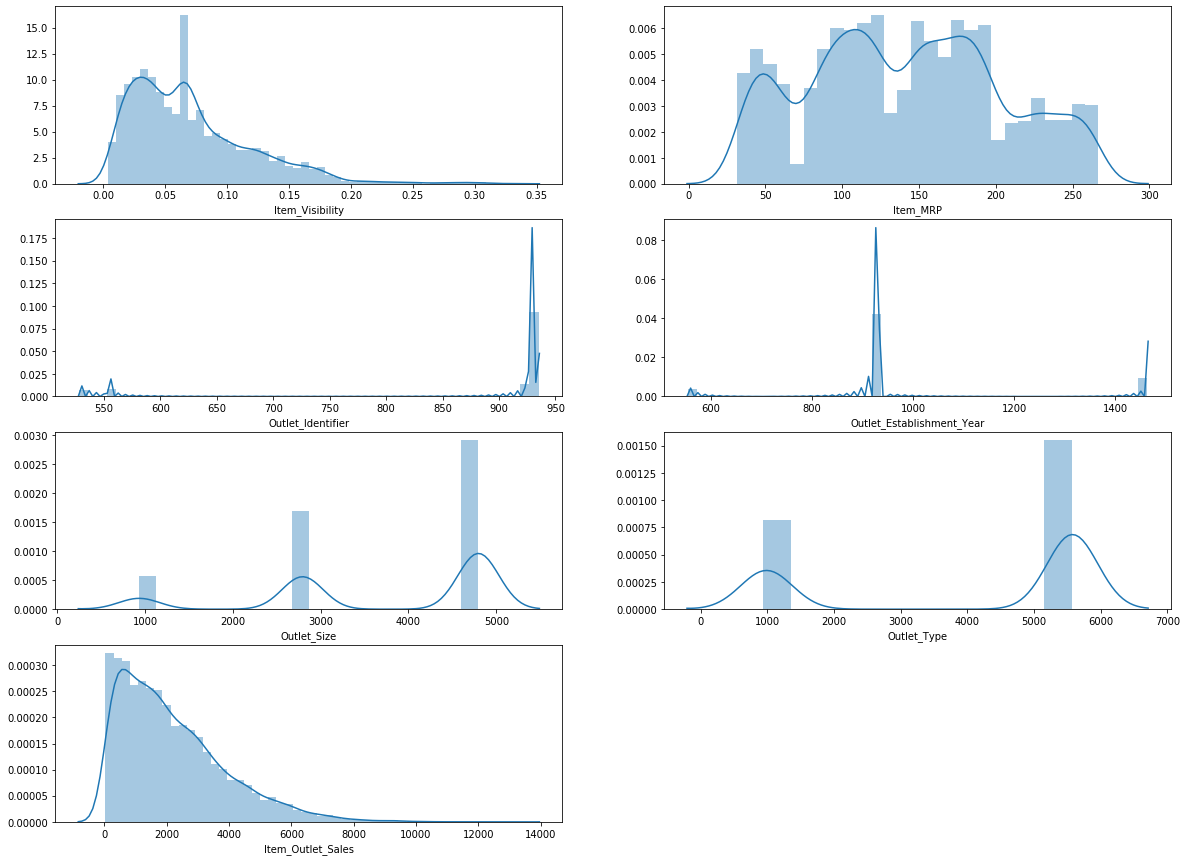

In [262]:
plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.distplot(data['Item_Visibility'])
plt.subplot(4,2,2)
sns.distplot(data['Item_MRP'])
plt.subplot(4,2,3)
sns.distplot(data['Outlet_Identifier'])
plt.subplot(4,2,4)
sns.distplot(data['Outlet_Establishment_Year'])
plt.subplot(4,2,5)
sns.distplot(data['Outlet_Size'])
plt.subplot(4,2,6)
sns.distplot(data['Outlet_Type'])
plt.subplot(4,2,7)
sns.distplot(data['Item_Outlet_Sales'])

## we can see that the data is not normally distributed and many columns like Item_Outlet_Sales and Item_Visibility are right skewed.....we can apply log transformation for reducing the skewness

In [263]:
#data['Item_MRP'] = data['Item_MRP'].astype('int64')
for i in data.columns:
    data[i] = np.log(data[i])

In [264]:
data.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,-4.132215,5.520697,6.835185,6.835185,7.934872,8.626227,8.225540
1,-3.948780,3.876794,6.833032,6.833032,7.934872,6.833032,6.094524
2,-4.088756,4.953133,6.835185,6.835185,7.934872,8.626227,7.648392
3,-2.716102,5.204529,6.318968,6.318968,8.475746,6.987490,6.596300
4,-2.716102,3.986414,6.837333,6.837333,6.837333,8.626227,6.902446


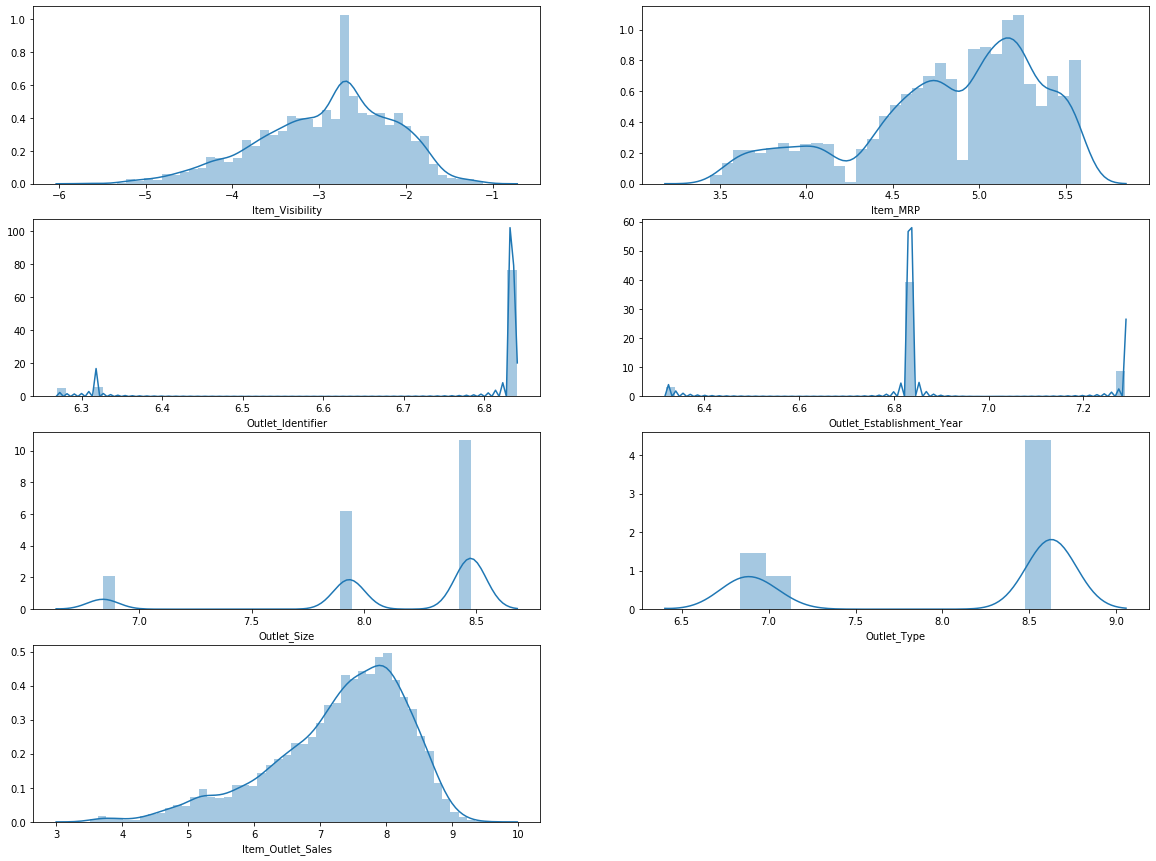

In [265]:
plt.figure(figsize=(20,15))
plt.subplot(4,2,1)
sns.distplot(data['Item_Visibility'])
plt.subplot(4,2,2)
sns.distplot(data['Item_MRP'])
plt.subplot(4,2,3)
sns.distplot(data['Outlet_Identifier'])
plt.subplot(4,2,4)
sns.distplot(data['Outlet_Establishment_Year'])
plt.subplot(4,2,5)
sns.distplot(data['Outlet_Size'])
plt.subplot(4,2,6)
sns.distplot(data['Outlet_Type'])
plt.subplot(4,2,7)
sns.distplot(data['Item_Outlet_Sales'])

## Now the model is ready for the training

In [267]:
x = data.drop(['Item_Outlet_Sales'],axis=1)
y = data['Item_Outlet_Sales']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

## Linear Regression

In [289]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
score_lr = lr.score(x_test,y_test)

0.7272951868299913
0.7306040205604029


In [274]:
# checking with Root mean squared error and R-squared error
from sklearn.metrics import mean_squared_error,r2_score
y_pred = lr.predict(x_test)
print("R2-error:",r2_score(y_test,y_pred))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2-error: 0.730604020560403
Root mean squared error:  0.5314718439801184


## Decision Tree

In [287]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))
score_dt = dt.score(x_test,y_test)

0.9999999999723966
0.4712403718390784


## Random Forest

In [308]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))
score_rf = rf.score(x_test,y_test)

0.9572104232119524
0.7050368486600337


## Bagging Regression

In [309]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(max_samples=100)
br.fit(x_train,y_train)
print(br.score(x_train,y_train))
print(br.score(x_test,y_test))
score_br = br.score(x_test,y_test)

0.7102358686344835
0.7051395630364052


## Gradient Boosting

In [310]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
print(gb.score(x_train,y_train))
print(gb.score(x_test,y_test))
score_gb = gb.score(x_test,y_test)

0.7559446397033149
0.7437458929305844


## Adaptive Boosting

In [311]:
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor()
ar.fit(x_train,y_train)
print(ar.score(x_train,y_train))
print(ar.score(x_test,y_test))
score_ar = ar.score(x_test,y_test)

0.6646200032351002
0.6645922097799746


## SVM

In [312]:
from sklearn.svm import SVR
svm = SVR(kernel='linear')
svm.fit(x_train,y_train)
print(svm.score(x_train,y_train))
print(svm.score(x_test,y_test))
score_svm = svm.score(x_test,y_test)

0.7223724161931424
0.7260552115301677


In [313]:
name = ['Linear Regression','Decision Tree','Random Forest',"Bagging",'Gadient Boosting','AdaBoost','SVM']
dataframe = pd.DataFrame({'Score':[score_lr,score_dt,score_rf,score_br,score_gb,score_ar,score_svm]},index=name)
dataframe

,Score
Linear Regression,0.730604
Decision Tree,0.471240
Random Forest,0.705037
Bagging,0.705140
Gadient Boosting,0.743746
AdaBoost,0.664592
SVM,0.726055


In [314]:
dataframe.sort_values(by='Score')

,Score
Decision Tree,0.471240
AdaBoost,0.664592
Random Forest,0.705037
Bagging,0.705140
SVM,0.726055
Linear Regression,0.730604
Gadient Boosting,0.743746


## looks like Gradient Boosting is giving the best result 